[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 1.710392804487423e-05


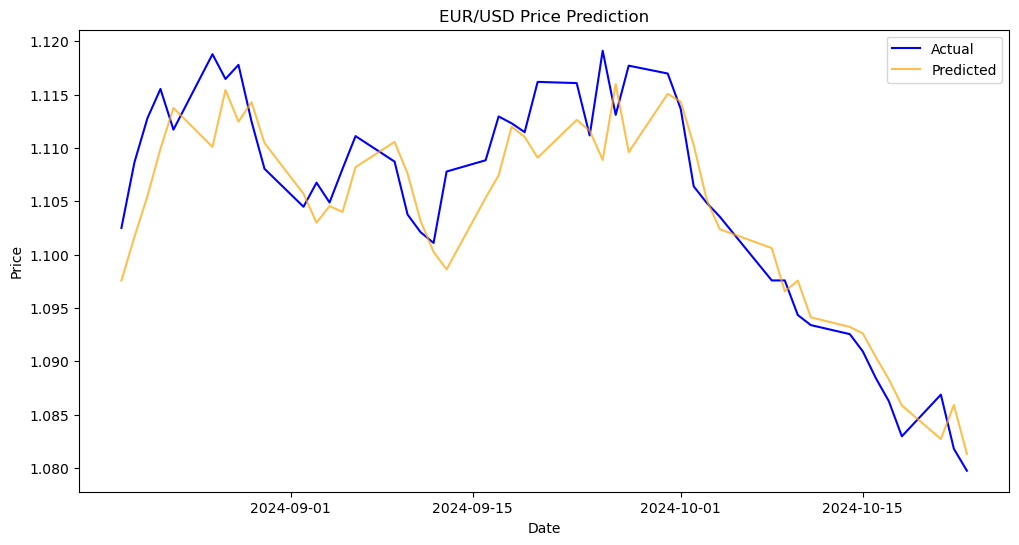

In [13]:
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Data Collection
def fetch_data():
    data = yf.download('EURUSD=X', start='2023-10-23', end='2024-10-24', interval='1d')
    return data

# Step 2: Data Preprocessing
def preprocess_data(data):
    # Create lagged features
    for lag in range(1, 6):
        data[f'lag_{lag}'] = data['Close'].shift(lag)

    # Create additional features
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_30'] = data['Close'].rolling(window=30).mean()

    # Drop NaN values
    data = data.dropna()

    # Define features and target
    X = data[[f'lag_{lag}' for lag in range(1, 6)] + ['SMA_10', 'SMA_30']]
    y = data['Close']
    
    return X, y

# Step 3: Train-Test Split
def train_test_split_data(X, y):
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Model Selection and Training
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Step 5: Prediction and Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    return y_pred

# Step 6: Visualization
def plot_results(y_test, y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted', color='orange', alpha=0.7)
    plt.title('EUR/USD Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main Function
def main():
    data = fetch_data()
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = train_test_split_data(X, y)
    model = train_model(X_train, y_train)
    y_pred = evaluate_model(model, X_test, y_test)
    plot_results(y_test, y_pred)

main()
